# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 21.09.2020

Мягкий дедлайн: 02:59MSK 05.10.2020

Жесткий дедлайн: 23:59MSK 08.10.2020

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [2]:
!pip install folium

  Using cached folium-0.11.0-py2.py3-none-any.whl (93 kB)
  Using cached branca-0.4.1-py3-none-any.whl (24 kB)
  Using cached requests-2.24.0-py2.py3-none-any.whl (61 kB)
  Using cached urllib3-1.25.10-py2.py3-none-any.whl (127 kB)
  Using cached certifi-2020.6.20-py2.py3-none-any.whl (156 kB)
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Using cached chardet-3.0.4-py2.py3-none-any.whl (133 kB)


In [1]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [3]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df_train = pd.read_csv('train.csv')

Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [4]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df_train.drop('dropoff_datetime', axis=1, inplace=True)
df_train['pickup_datetime'] = pd.to_datetime(df_train['pickup_datetime'])
df_train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,373


В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

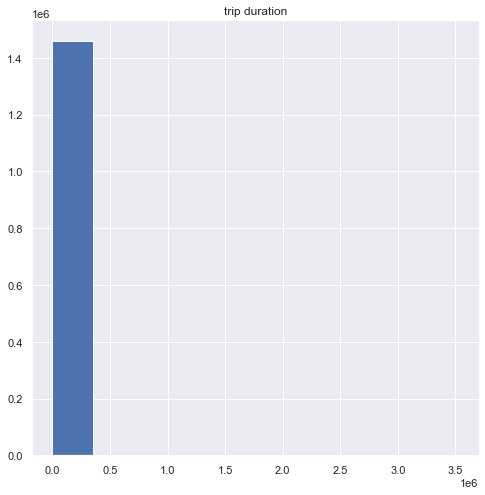

In [5]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.figure(figsize=(8, 8))
plt.hist(df_train['trip_duration'])
plt.title('trip duration')
plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

Ясен пень, что есть выбросы у которых trip_duration 6 порядка. Поэтому гистограмма такая. Большинство объектов адекватные, поэтому при масштабировании попадают в одну большую колонку.

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

Потому что эта штука не так сильно штрафует за выбросы как RMSE. И можно оценить объективное качество модели.
Предположим, что у нас есть выброс. Тогда логарифм этот выброс сильно уменьшит, и метрика не очень сильно оштрафует модель за него. Сопоставимо с другими ошибками. MSE же добавит в сумму огромный штраф за выброс, который собой перекроет все остальные страрания модели. Если формально: пусть у нас есть 2 модели. 1 в целом лучше, но чуть больше промахивается с выбросами. 2 похуже на всем, но на выбросах чуть лучше. Тогда MSE за выбросы влепит первой модели штраф больший на порядок самого выброса. И итоговое качество у первой модели будет меньше. Авторам важно, чтоб модель хорошо работала в целом, а не чуть лучше на выбросах. 

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: $$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2} = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\hat{y}_i - \log{(\exp(\hat{a}(x_i)) - 1 + 1)}\big)^2} = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\hat{y}_i - \hat{a}(x_i)\big)^2} = \text{RMSE}(X, \hat{y}, \hat{a})$$

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [6]:
df_train['log_trip_duration'] = np.log1p(df_train['trip_duration'])
#df_train.drop('trip_duration', axis=1, inplace=True) эта строка удаляет колонку с trip_duration, но он нам еще пригодятся потом

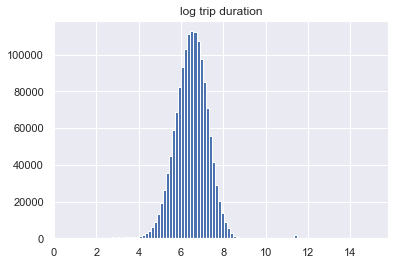

In [7]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.hist(df_train['log_trip_duration'], bins=100)
plt.title('log trip duration')
plt.show()

In [8]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import sklearn
from sklearn.metrics import mean_squared_error
y_hat_mean = np.full(df_train.shape[0], np.mean(df_train['log_trip_duration']))
mean_squared_error(df_train['log_trip_duration'], y_hat_mean) ** 0.5 #0.7957592365411509

0.7957592365411509

## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

In [9]:
df_train['date'] = df_train['pickup_datetime'].dt.date

Text(0.5, 1.0, 'num of trips')

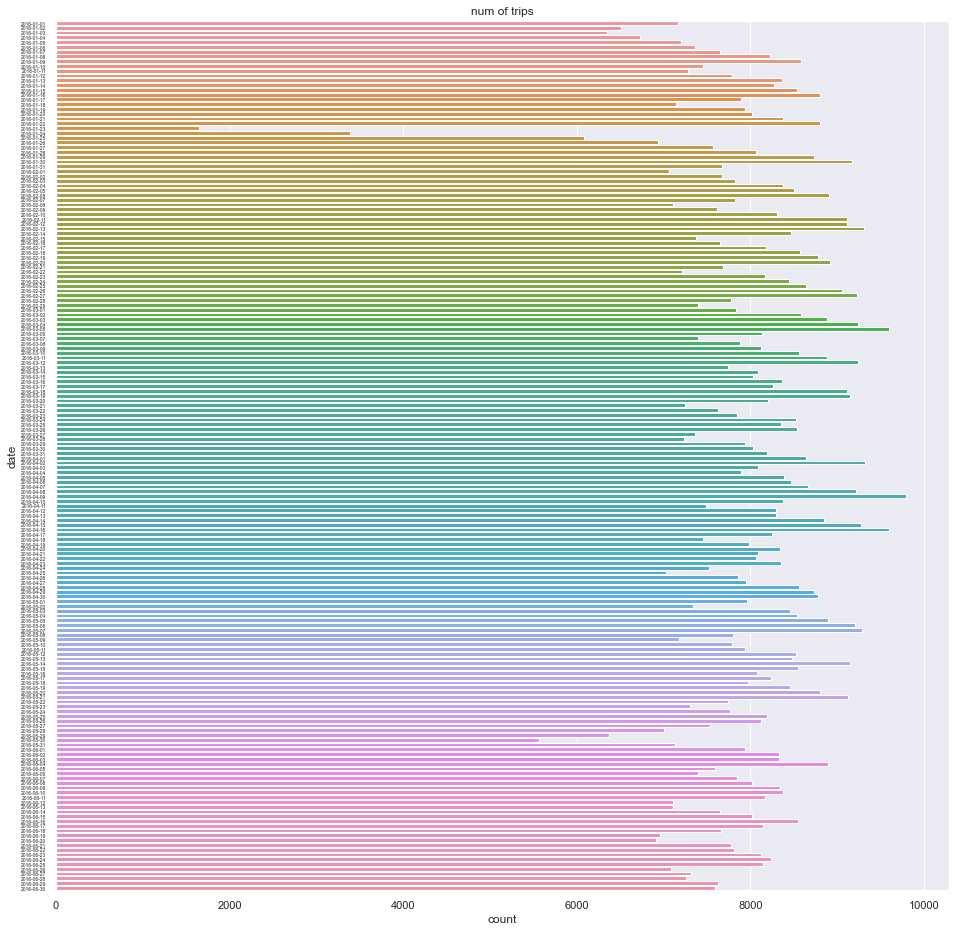

In [7]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:

sns.set(rc={'figure.figsize':(16.0,16.0)})
ax = sns.countplot(y='date', data=df_train.sort_values(by='date', ascending=True)) 
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha="right", fontsize=5) # я понимаю, что дат нифига не видно, но,
# во-первых, не очень-то и хотелось, а, во-вторых, они друг друга не перекрывают, так что уже идеально
ax.set_title('num of trips')

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

In [10]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# Находим аномальные даты
gr = df_train[['date', 'id']].groupby('date').count()
gr[gr['id'] < 6000]

,id
date,
2016-01-23,1648
2016-01-24,3383
2016-05-30,5570


23-24 января 2016 в Нью-йорке был сильный снегопад, поэтому власти запретили движение машин (кроме экстренных служб). Логично, что количество поездок на такси сократилось.

29 мая 2016 (за день до) произошел сбой компьютерных систем в аэропорту, в результате чего, было отменено куча рейсов. Не ясно, почему люди из-за этого стали меньше вызывать такси, но, видимо, почему-то поэтому.

In [11]:
df_train['weekday_numeric'] = df_train['pickup_datetime'].dt.weekday
df_train['hour'] = df_train['pickup_datetime'].dt.hour
gr_hour = df_train.groupby('hour').count()[['id']]

wkd = pd.Index(['monday', 'tuesday', 'wensday', 'thursday', 'friday', 'satarday', 'sunday'])
gr_weekday = df_train.groupby('weekday_numeric').count()[['id']].set_index(wkd)

Text(0.5, 0.98, 'num of trips by days of week')

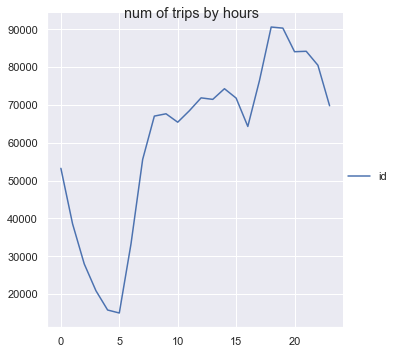

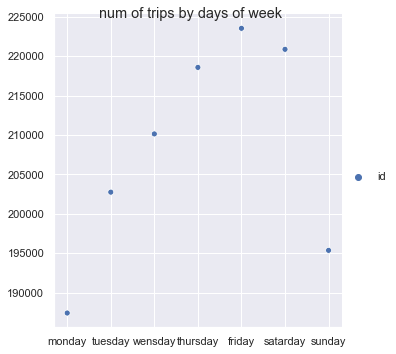

In [22]:
# строим графики


sns.set(rc={'figure.figsize':(10.0,10.0)})
ax = sns.relplot(data=gr_hour, kind="line")
bx = sns.relplot(data=gr_weekday)
ax.fig.suptitle("num of trips by hours")
bx.fig.suptitle("num of trips by days of week")

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

In [12]:
df_train['month'] = df_train['pickup_datetime'].dt.month 

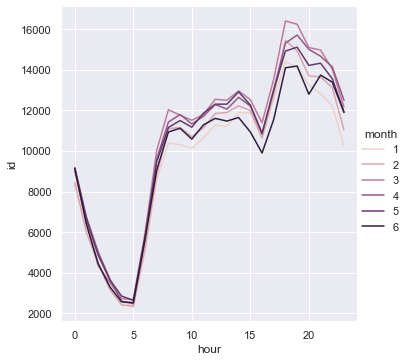

In [11]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:
ax = sns.relplot(data=df_train.groupby(['month', 'hour']).count()[['id']].reset_index(),
                 x="hour", y="id", hue="month", kind="line")

In [13]:
#mnh = pd.Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])
df_train = df_train.merge(gr_weekday.reset_index(), right_index=True, left_on='weekday_numeric', how='outer', 
               suffixes=['', '_y'])
df_train['weekday'] = df_train['index']
df_train.drop(['weekday_numeric', 'id_y', 'index'], axis=1, inplace=True)
gr_weekday = None
gr_hour = None

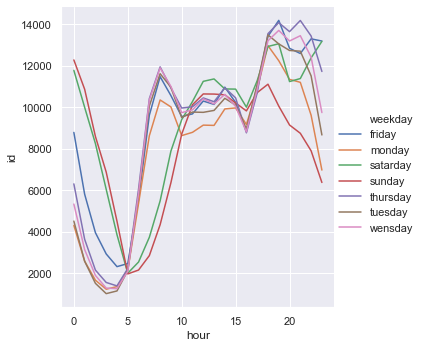

In [25]:
ax = sns.relplot(data=df_train.groupby(['weekday', 'hour']).count()[['id']].reset_index(),
                 x="hour", y="id", hue="weekday", kind="line")

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

Ну ясно, что выделяются время суток: ночью не особо люди катаются, а в конец рабочего дня наоборот побольше. Дни недели тоже выделяются. 2 линии, идущие выше дпугих в промежуток ночных часов - это суббота и воскресенье. Ну и пятница тоже чуть выше. Потому что выходные, тусим ночью. А вот вечер воскресенья наоборот проседает. Ну работы нет, откуда ехать на такси?
По месяцам отличий особо нет.

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3. По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

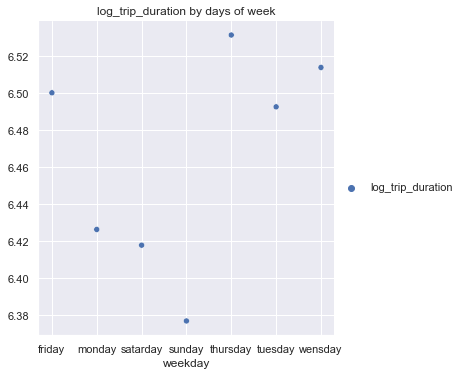

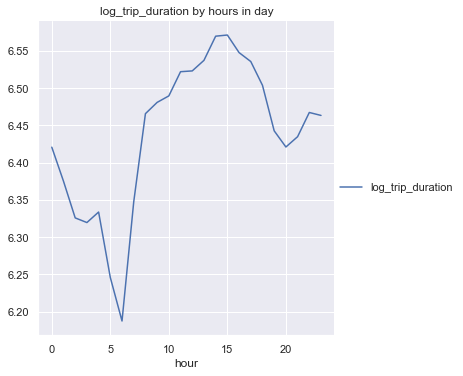

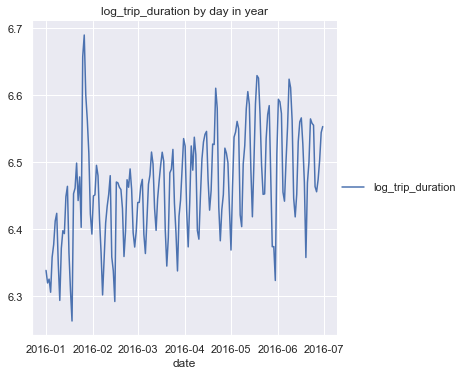

In [14]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train, 
                                                    df_train['log_trip_duration'], test_size=0.3)

sns.relplot(data=X_train[['log_trip_duration', 'weekday']].groupby('weekday').mean()).set(title='log_trip_duration by days of week') 
sns.relplot(data=X_train[['log_trip_duration', 'hour']].groupby('hour').mean(), kind='line').set(title='log_trip_duration by hours in day')
sns.relplot(data=X_train[['log_trip_duration', 'date']].groupby('date').mean(), kind='line').set(title='log_trip_duration by day in year')

X_train = None
X_test = None
y_train = None
y_test = None

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

Вообще не очень похожи. С днями недели скорее наоборот: в воскресенье и субботу очень недолгие поездки. Это потому что людям с работы до дома ехать фиксированное количество времени, а по воскресеньям люди чиллят, поэтому им ехать обычно нужно недалеко. Зависимость от часа в сутках тоже не очень совпадает. Самые долгие поездки днем. Вечером они наоборот чуть мешьше по времени ( по тем же причинам, вечерами люди тусят). Ночью график просаживается, но не так сильно. Не ясно, почему. казалось бы, ночью если едешь на таксоне, то далеко.
В первый аномальный период таргет очень большой, а во второй очень маленький. Второй объясняется легко: от аэропорта обычно очень долго ехать, а тут все эти поездки отпали. Остались только быстрые, вот и просадочка. А первый объяснить сложнее. Возможно, были несколько (мало) долгих поездок (из какого-нибудь аэропорта), которые разрешались (потому что не в Нью-Йорке). А все, что по центру запретили. А возможно, просто выброс есть. Ну типо таксист забыл отключить на эти 2 дня свой датчик.
Да, трень виден: средняя продолжительность поездки растет. Это сложно объяснить, но это и не просят))

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [15]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from datetime import date
from datetime import datetime
df_train['day'] = df_train['pickup_datetime'].dt.dayofyear
df_train['is_anomaly'] = ((df_train['date'] == datetime(2016, 1, 23).date()) |
                                 (df_train['date'] == datetime(2016, 1, 24).date()) | 
                                 (df_train['date'] == datetime(2016, 5, 30).date())).astype(int)

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков стоит рассматривать как категориальные, а какие - как численные? Почему?

Все добавленные нужно рассматривать, как категориальные (ну последний - бинарный, там не важно).
Потому что, например, из того, что у нас номер часа будет больше на один, совершенно не значит, что время поездки должна вырасти на какую-то константу. Аналогичная логика и с днями недели/номерами дней. От увеличения номера на 1, эффект может быть, как положительный, так и отрицательный. Но вообще я передумал и решил рассматривать номер дня, как численный. Во-первых, можно видеть явный линейный тренд на графике тагргета от номера дня. Во-вторых, просто не очень хочется бинарно кодировать 180 категориальных признаков.

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [16]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack, csr_matrix
scl = StandardScaler()
enc = OneHotEncoder()

X = hstack([enc.fit_transform(df_train[['weekday', 'month', 'hour']]),
            csr_matrix(scl.fit_transform(df_train[['day', 'is_anomaly']]))]) # Ну бинарные признаки можно было и не масштабировать, но я так только один раз))0
reg = Ridge()
reg.fit(X, df_train['log_trip_duration'])

Ridge()

In [17]:
mean_squared_error(df_train['log_trip_duration'], reg.predict(X)) ** 0.5

0.7888815411039747

## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [18]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [19]:
df = df_train

In [20]:
show_circles_on_map(df.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [21]:
show_circles_on_map(df.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие две точки выделяются на карте?

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [22]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:
#код с первого семинара
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

df_train.loc[:, 'haversine'] = haversine_array(df_train['pickup_latitude'].values, 
                                               df_train['pickup_longitude'].values,
                                               df_train['dropoff_latitude'].values,
                                               df_train['dropoff_longitude'].values)
df_train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,date,hour,month,weekday,day,is_anomaly,haversine
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493,2016-03-14,17,3,monday,74,0,1.498521
15,id3319787,1,2016-05-16 15:29:02,1,-73.955513,40.768593,-73.948761,40.771545,N,211,5.356586,2016-05-16,15,5,monday,137,0,0.656578
16,id3379579,2,2016-04-11 17:29:50,1,-73.991165,40.755562,-73.999290,40.725353,N,2316,7.748029,2016-04-11,17,4,monday,102,0,3.428086
18,id3552682,1,2016-06-27 09:55:13,1,-74.003983,40.713013,-73.979195,40.749924,N,1317,7.183871,2016-06-27,9,6,monday,179,0,4.605201
27,id2104175,1,2016-06-20 23:07:16,1,-73.958435,40.713192,-73.949539,40.680252,N,694,6.543912,2016-06-20,23,6,monday,172,0,3.738742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458607,id3914209,1,2016-03-17 10:28:48,1,-74.006622,40.731514,-74.009918,40.721397,N,547,6.306275,2016-03-17,10,3,thursday,77,0,1.158691
1458620,id0694577,2,2016-04-28 20:51:03,1,-73.966324,40.758072,-74.006516,40.736641,N,1162,7.058758,2016-04-28,20,4,thursday,119,0,4.140317
1458627,id0439281,2,2016-06-23 10:10:28,5,-73.981651,40.767708,-73.959183,40.777412,N,880,6.781058,2016-06-23,10,6,thursday,175,0,2.178145
1458633,id2432342,1,2016-03-17 19:10:16,3,-73.979652,40.735279,-73.995522,40.759754,N,979,6.887553,2016-03-17,19,3,thursday,77,0,3.032111


Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку:

In [23]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df_train['log_haversine'] = np.log1p(df_train['haversine'])

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [24]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df_train[['log_trip_duration', 'log_haversine', 'haversine']].corr() # 0.749882 > 0.573595, убедились

,log_trip_duration,log_haversine,haversine
log_trip_duration,1.000000,0.749882,0.573595
log_haversine,0.749882,1.000000,0.844501
haversine,0.573595,0.844501,1.000000


**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

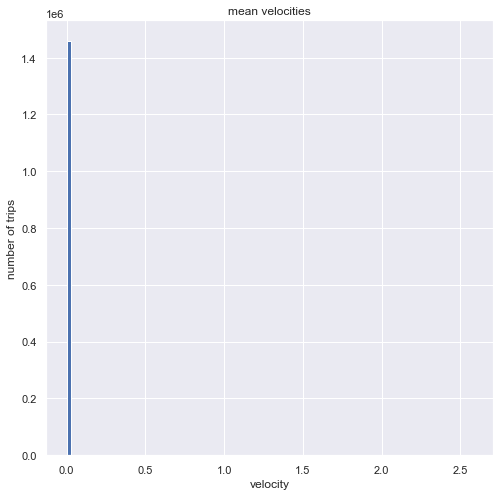

In [25]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df_train['velocity'] = df_train['haversine'] / df_train['trip_duration']
plt.figure(figsize=(8.0, 8.0))
plt.hist(df_train['velocity'], bins=100)
plt.title('mean velocities')
plt.xlabel('velocity')
plt.ylabel('number of trips')
plt.show()

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

0.011318139959979996


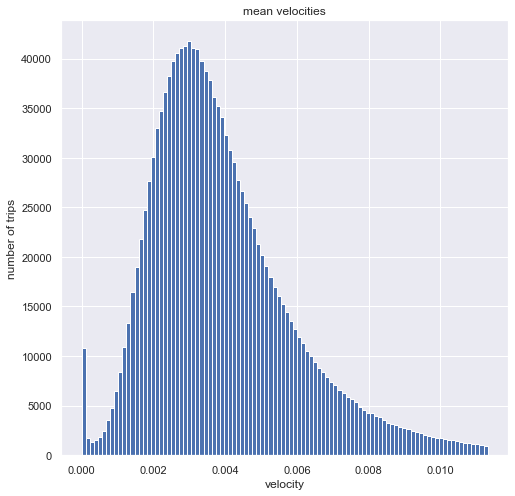

In [26]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.figure(figsize=(8.0, 8.0))
q = df_train['velocity'].quantile(q=0.99)
print(q)
plt.hist(df_train['velocity'][df_train['velocity'] < q], bins=100)
plt.title('mean velocities')
plt.xlabel('velocity')
plt.ylabel('number of trips')
plt.show()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

<AxesSubplot:xlabel='weekday', ylabel='hour'>

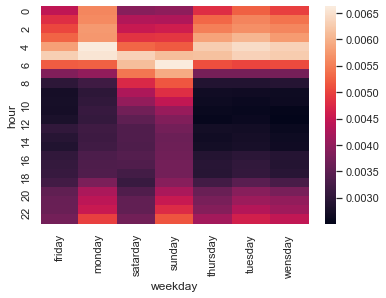

In [27]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
pv = df_train.groupby(['hour', 'weekday'])[['velocity']].median().reset_index().pivot('hour', 'weekday', values='velocity')
sns.heatmap(pv)

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения? 
Потому что logv = logs - logt, где logs - известный нам признак, а logt - наш таргет. То есть мы вшиваем правильый ответ в скорость. Логично ожидать, что модель научится это понимать.  

In [28]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df_train.drop('velocity', axis=1, inplace=True)

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.
Минимальна: по будням с 9 до 14. Я думаю, что в Нью-Йорке в это время час пик и пробочки. Максимальна: с 4 до 6 каждый день.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [29]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df_train['is_traffic'] = ((df_train['hour'] >= 7) & (df_train['hour'] <= 20) &
                                  (df_train['weekday'] != 'sunday') & (df_train['weekday'] != 'satarday')).astype(int)
df_train['no_traffic'] = ((df_train['hour'] >= 1) & (df_train['hour'] <= 6)).astype(int)
df_train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,date,hour,month,weekday,day,is_anomaly,haversine,log_haversine,is_traffic,no_traffic
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,...,2016-03-14,17,3,monday,74,0,1.498521,0.915699,1,0
15,id3319787,1,2016-05-16 15:29:02,1,-73.955513,40.768593,-73.948761,40.771545,N,211,...,2016-05-16,15,5,monday,137,0,0.656578,0.504754,1,0
16,id3379579,2,2016-04-11 17:29:50,1,-73.991165,40.755562,-73.999290,40.725353,N,2316,...,2016-04-11,17,4,monday,102,0,3.428086,1.487967,1,0
18,id3552682,1,2016-06-27 09:55:13,1,-74.003983,40.713013,-73.979195,40.749924,N,1317,...,2016-06-27,9,6,monday,179,0,4.605201,1.723695,1,0
27,id2104175,1,2016-06-20 23:07:16,1,-73.958435,40.713192,-73.949539,40.680252,N,694,...,2016-06-20,23,6,monday,172,0,3.738742,1.555772,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458607,id3914209,1,2016-03-17 10:28:48,1,-74.006622,40.731514,-74.009918,40.721397,N,547,...,2016-03-17,10,3,thursday,77,0,1.158691,0.769502,1,0
1458620,id0694577,2,2016-04-28 20:51:03,1,-73.966324,40.758072,-74.006516,40.736641,N,1162,...,2016-04-28,20,4,thursday,119,0,4.140317,1.637115,1,0
1458627,id0439281,2,2016-06-23 10:10:28,5,-73.981651,40.767708,-73.959183,40.777412,N,880,...,2016-06-23,10,6,thursday,175,0,2.178145,1.156298,1,0
1458633,id2432342,1,2016-03-17 19:10:16,3,-73.979652,40.735279,-73.995522,40.759754,N,979,...,2016-03-17,19,3,thursday,77,0,3.032111,1.394290,1,0


**Задание 8 (0.25 балла)**. Как уже было замечено выше, на карте выделяются две точки вдали от Манхэттена. Для каждой из них добавьте в выборку два признака: началась ли поездка в ней и закончилась ли она в ней.

In [30]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
#40.687855, -74.176122  +-0.3
#40.646922, -73.784737  
df_train['pickup_elizabeth'] = ((df_train['pickup_longitude'] < -74.146122) &
                                (df_train['pickup_longitude'] > -74.206122) &
                                (df_train['pickup_latitude'] > 40.657855) &
                                (df_train['pickup_latitude'] < 40.717855)).astype(int)
df_train['dropoff_elizabeth'] = ((df_train['dropoff_longitude'] < -74.146122) &
                                (df_train['dropoff_longitude'] > -74.206122) &
                                (df_train['dropoff_latitude'] > 40.657855) &
                                (df_train['dropoff_latitude'] < 40.717855)).astype(int)
df_train['pickup_kennedy'] = ((df_train['pickup_longitude'] < -73.754737) &
                                (df_train['pickup_longitude'] > -73.814737) &
                                (df_train['pickup_latitude'] > 40.616922) &
                                (df_train['pickup_latitude'] < 40.676922)).astype(int)
df_train['dropoff_kennedy'] = ((df_train['dropoff_longitude'] < -73.754737) &
                                (df_train['dropoff_longitude'] > -73.814737) &
                                (df_train['dropoff_latitude'] > 40.616922) &
                                (df_train['dropoff_latitude'] < 40.676922)).astype(int)

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

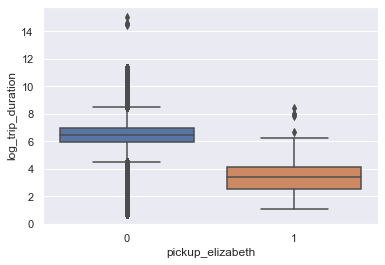

In [31]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
ax = sns.boxplot(x="pickup_elizabeth", y="log_trip_duration", data=df_train)

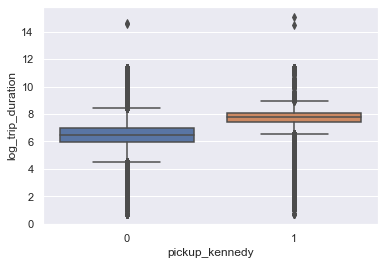

In [32]:
ax = sns.boxplot(x="pickup_kennedy", y="log_trip_duration", data=df_train)

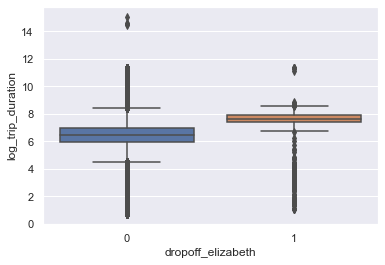

In [33]:
ax = sns.boxplot(x="dropoff_elizabeth", y="log_trip_duration", data=df_train)

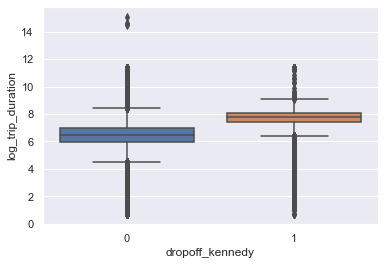

In [34]:
ax = sns.boxplot(x="dropoff_kennedy", y="log_trip_duration", data=df_train)

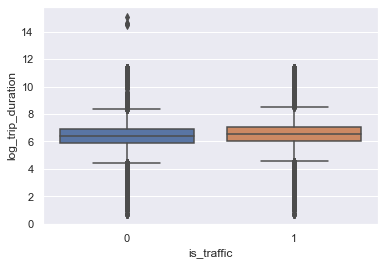

In [35]:
ax = sns.boxplot(x="is_traffic", y="log_trip_duration", data=df_train)

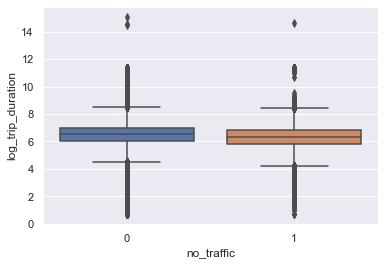

In [36]:
ax = sns.boxplot(x="no_traffic", y="log_trip_duration", data=df_train)

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

На всех графиках коробки не пересекаются, значит, большая часть выборки тоже не пересекается. Это значит, что наш признак хорошо отделил эти категории. Медианные значения двух групп везде отличаются почти на 1. Т.е. длина поездки в e~3 раза! Выглядит, как круто. Это было про первые 4. У остальных такое себе. Выглядят очень похоже. Это значит, что эти 2 признакиа не очень хорошие. Но в целом признаки норм.

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [37]:
from sklearn.base import BaseEstimator, TransformerMixin
LOW_LATITUDE = 40.702489 
UP_LATITUDE = 40.794584 
LOW_LONGITUDE = -74.015296
UP_LONGITUDE = -73.937330

class MapGridTransformer(BaseEstimator, TransformerMixin):
    #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    def __init__(self, nrows=10, ncols=10):
        self.nrows = nrows
        self.ncols = ncols
        self.df_ = pd.DataFrame()
        
    def fit(self, X):
        df = X.copy()
        n = self.ncols * self.nrows
        df['pickup_cell'] = -1
        df['dropoff_cell'] = -1
        for i in range(self.nrows):
            for j in range(self.ncols):
                lat = LOW_LATITUDE + (UP_LATITUDE - LOW_LATITUDE) / self.nrows * i
                lon = LOW_LONGITUDE + (UP_LONGITUDE - LOW_LONGITUDE) / self.ncols * j
                df['pickup_cell'] = df['pickup_cell'] + ((df['pickup_latitude'] < UP_LATITUDE) & 
                                                        (df['pickup_longitude'] < UP_LONGITUDE) &
                                                        (df['pickup_latitude'] > lat) &
                                                        (df['pickup_longitude'] > lon)).astype(int) 
                df['dropoff_cell'] = df['dropoff_cell'] + ((df['dropoff_latitude'] < UP_LATITUDE) & 
                                                        (df['dropoff_longitude'] < UP_LONGITUDE) &
                                                        (df['dropoff_latitude'] > lat) &
                                                        (df['dropoff_longitude'] > lon)).astype(int) 
        self.df_ = df
        return self
    
    def transform(self):
        return self.df_

In [43]:
mgt = MapGridTransformer(8, 8)
df_train = mgt.fit(df_train).transform()

In [44]:
df_train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,haversine,log_haversine,is_traffic,no_traffic,pickup_elizabeth,dropoff_elizabeth,pickup_kennedy,dropoff_kennedy,pickup_cell,dropoff_cell
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,...,1.498521,0.915699,1,0,0,0,0,0,23,35
15,id3319787,1,2016-05-16 15:29:02,1,-73.955513,40.768593,-73.948761,40.771545,N,211,...,0.656578,0.504754,1,0,0,0,0,0,41,41
16,id3379579,2,2016-04-11 17:29:50,1,-73.991165,40.755562,-73.999290,40.725353,N,2316,...,3.428086,1.487967,1,0,0,0,0,0,14,3
18,id3552682,1,2016-06-27 09:55:13,1,-74.003983,40.713013,-73.979195,40.749924,N,1317,...,4.605201,1.723695,1,0,0,0,0,0,1,19
27,id2104175,1,2016-06-20 23:07:16,1,-73.958435,40.713192,-73.949539,40.680252,N,694,...,3.738742,1.555772,0,0,0,0,0,0,5,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458607,id3914209,1,2016-03-17 10:28:48,1,-74.006622,40.731514,-74.009918,40.721397,N,547,...,1.158691,0.769502,1,0,0,0,0,0,2,1
1458620,id0694577,2,2016-04-28 20:51:03,1,-73.966324,40.758072,-74.006516,40.736641,N,1162,...,4.140317,1.637115,1,0,0,0,0,0,29,2
1458627,id0439281,2,2016-06-23 10:10:28,5,-73.981651,40.767708,-73.959183,40.777412,N,880,...,2.178145,1.156298,1,0,0,0,0,0,23,41
1458633,id2432342,1,2016-03-17 19:10:16,3,-73.979652,40.735279,-73.995522,40.759754,N,979,...,3.032111,1.394290,1,0,0,0,0,0,11,14


In [45]:
#работает
df_help = mgt.transform()[['pickup_longitude', 'pickup_latitude', 'pickup_cell']].groupby('pickup_cell').mean().sample(30)
show_circles_on_map(df_help, "pickup_latitude", "pickup_longitude", "blue")

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [46]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

scl2 = StandardScaler()
enc2 = OneHotEncoder(categories='auto')

X2 = hstack([X,
             enc2.fit_transform(df_train[['pickup_cell', 'dropoff_cell']]),
            csr_matrix(scl2.fit_transform(df_train[['log_haversine']])), 
             csr_matrix(df_train[['is_traffic', 'no_traffic', 'pickup_elizabeth',
                                  'pickup_kennedy', 'dropoff_elizabeth', 'dropoff_kennedy']])])
reg2 = Ridge()
reg2.fit(X2, df_train['log_trip_duration'])

Ridge()

In [47]:
mean_squared_error(df_train['log_trip_duration'], reg2.predict(X2)) ** 0.5 # 0.47382345063071823 уже норм

0.4739304676198087

## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

1) vendor_id - id провайдера, который записывает поездку. Может оказаться, что поездки одного класса (например, более дорогие и комфортные) курирует один провайдер. Тогда из за цены его поездки более быстрые в среднем. 
2) один пассажир обычно едет куда-нибудь далеко. Несколько же обычно едут не очень далеко, так как большой группе людей после бара условно не очень надо ехать далеко. Какая-нибудь такая логика может быть применима.
3) Выключенный радар может означать, во-первых, то, что такси бомже-класса. Тогда его поездки могут быть быстрее (потому что нищеброды на дальние расстояния не катаются). Во-вторых, радар может не работать в некоторых местах, через которые проходят только длинные маршруты. Соответственно, долгие. 

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [48]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df_train['vendor_id'].unique() # 2

array([2, 1], dtype=int64)

In [49]:
df_train['passenger_count'].unique() # 9

array([1, 6, 3, 2, 5, 4, 0, 7, 9, 8], dtype=int64)

In [50]:
df_train['store_and_fwd_flag'].unique() # 2

array(['N', 'Y'], dtype=object)

Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

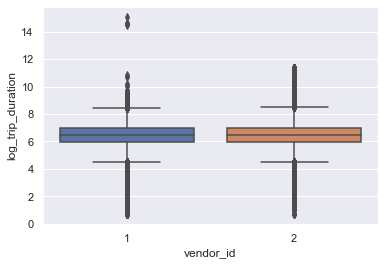

In [51]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
ax = sns.boxplot(x="vendor_id", y="log_trip_duration", data=df_train)

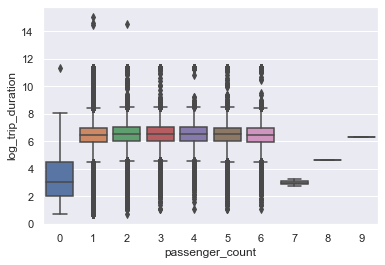

In [52]:
ax = sns.boxplot(x="passenger_count", y="log_trip_duration", data=df_train)

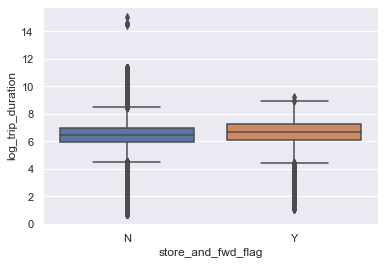

In [53]:
ax = sns.boxplot(x="store_and_fwd_flag", y="log_trip_duration", data=df_train)

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [54]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df_train['vendor_id'] = (df_train['vendor_id'] == 1).astype(int)
df_train['store_and_fwd_flag'] = (df_train['store_and_fwd_flag'] == 'Y').astype(int)

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?
Не думаю, графики очень похожи (с т.з. медианы и дисперсии). Исключения составляют 0 и 7 пассажиров, но их очень мало скорее всего. К тому же они не выбросы. Ну вот только 3 признак мб будет сильным. У него дисперсии разные, да и медианы чутка  отличаются.

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [67]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

enc3 = OneHotEncoder()

X3 = hstack([X2, enc3.fit_transform(df_train[['passenger_count']]),
            csr_matrix(df_train[['vendor_id', 'store_and_fwd_flag']])])
reg3 = Ridge()
reg3.fit(X3, df_train['log_trip_duration'])

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [69]:
mean_squared_error(df_train['log_trip_duration'], reg3.predict(X3)) ** 0.5 # изменилс тоо 4 знак после зпт. Такие себе признаки)

0.47338035604626927

Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

In [72]:
df_train.drop(['vendor_id', 'vendor_id', 'store_and_fwd_flag'], axis=1, inplace=True) # Так и поступим

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты: с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите обучающую выборку от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

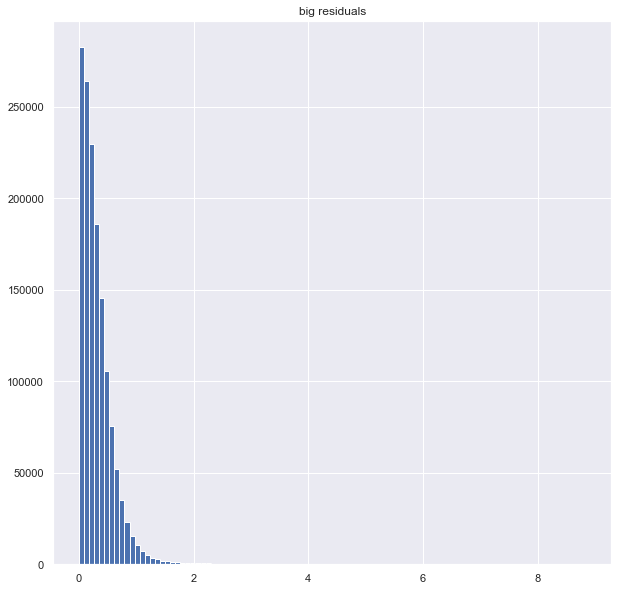

In [100]:
#Начнем с остатков регрессии (это вроде residual по эльфийски)
residuals = abs(df_train['log_trip_duration'] - reg3.predict(X3))
plt.hist(residuals, bins=100)
plt.title('big residuals')
plt.show()

In [101]:
print(len(df_train[residuals > 2]))
df = df_train[residuals < 2]

7559


Невелика потеря. Теперь ко времени

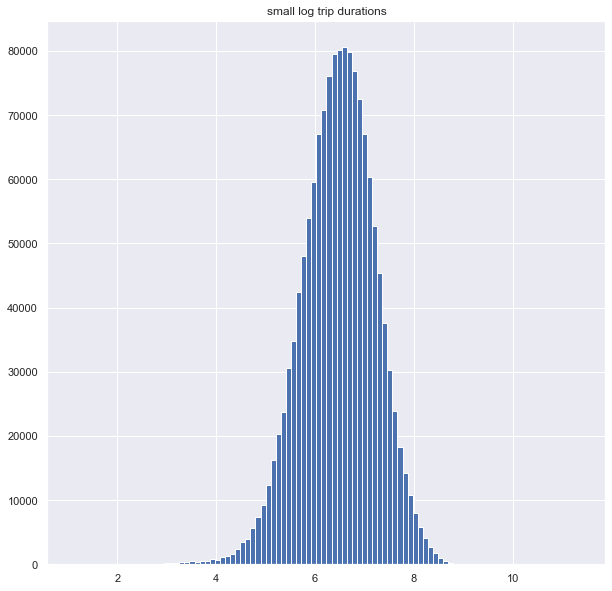

In [102]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:
#df_small_time = df_train[df_train['log_trip_duration'] < 4]
plt.hist(df['log_trip_duration'], bins=100)
plt.title('small log trip durations')
plt.show()

Объясню, почему я строю гистограму логафирма. Потому что мы обучаемся именно на логарифме, и надо смотреть, какое изменение количества нам дает именно логарифма. Потому что изменение trip_duration на 1 нам почти не даст изменения количества. 
Я бы назвал выбросами те, у кого log_trip_duration < 3. Сложно представить норм поездку на 50 сек. 
Ну и выкинем их.

In [103]:
print(len(df[df['log_trip_duration'] < 4])) # 4к всего
df = df[df['log_trip_duration'] > 4]

4379


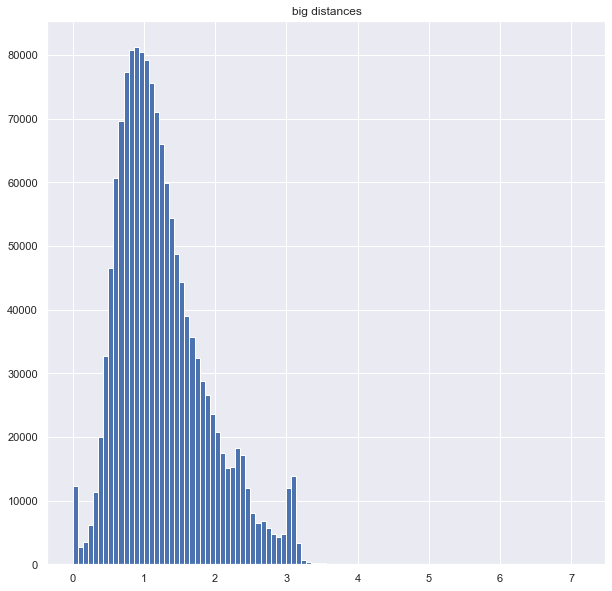

In [104]:
#df_big_dist = df_train[df_train['log_haversine'] > 4]
plt.hist(df_train['log_haversine'], bins=100)
plt.title('big distances')
plt.show()

Видно, что с 3.3 количество проседает. Я решил, что выброс - те, кто едет более 30км по прямой (т.е. log_haversine < 4). Ну выкинем штук 1000, их не жалко.

In [107]:
print(len(df[df['log_haversine'] > 3.3]))
df = df[df['log_haversine'] < 3.3]

1090


Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Попробуйте объединить редкие категории в одну. Естественно, делать это нужно только для действительно редких категорий.

[Text(0, 0.5, ''), Text(0.5, 1.0, 'distribution by pickup cells')]

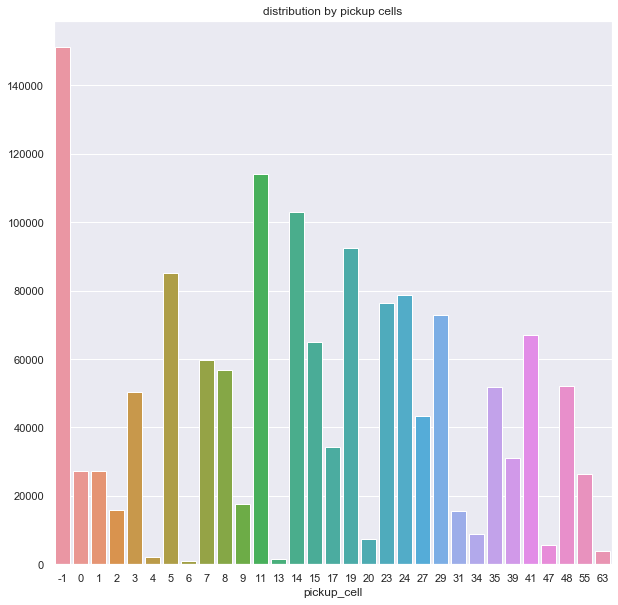

In [129]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ #ясен пень, что в weekday, hour, month нет редких категорий. А вот в pickup_cell и dropoff_cell могут быть вполне себе
ax = sns.barplot(x="pickup_cell", y="id", data=df.groupby('pickup_cell').count()[['id']].reset_index())
ax.set(ylabel='', title='distribution by pickup cells')

[Text(0, 0.5, ''), Text(0.5, 1.0, 'distribution by dropoff cells')]

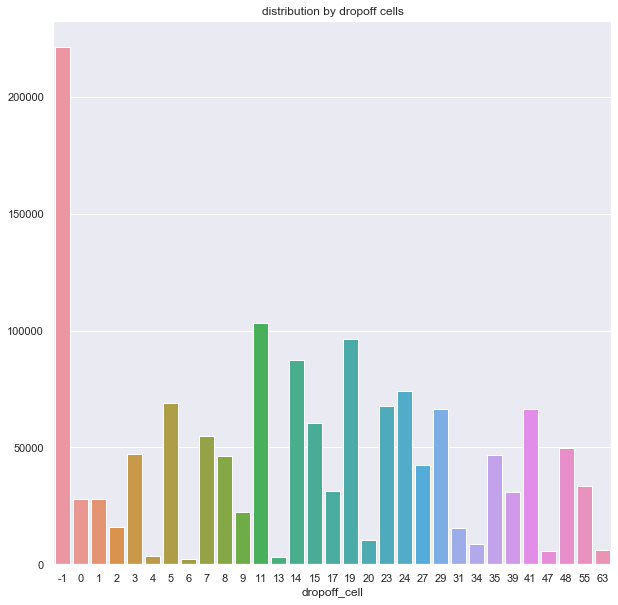

In [130]:
ax = sns.barplot(x="dropoff_cell", y="id", data=df.groupby('dropoff_cell').count()[['id']].reset_index())
ax.set(ylabel='', title='distribution by dropoff cells')

Сразу видно, самые редкие категории. Их не так много в сумме. Ну и выкинем те, где на глазок меньше 10к. Всего выкинем 50к.

In [139]:
print(len(df[(df['pickup_cell'] == 6) | (df['pickup_cell'] == 4) | (df['pickup_cell'] == 13) |
            (df['pickup_cell'] == 63) | (df['pickup_cell'] == 47) | (df['pickup_cell'] == 20)])) # в pickup
print(len(df[(df['dropoff_cell'] == 6) | (df['dropoff_cell'] == 4) | (df['dropoff_cell'] == 13) | 
            (df['dropoff_cell'] == 63) | (df['dropoff_cell'] == 47) | (df['dropoff_cell'] == 34)])) # в dropoff
print(len(df))
df = df[(df['dropoff_cell'] != 6) & (df['dropoff_cell'] != 4) & (df['dropoff_cell'] != 13) & 
            (df['dropoff_cell'] != 63) & (df['dropoff_cell'] != 47) & (df['dropoff_cell'] != 34)]
df  = df[(df['pickup_cell'] != 6) & (df['pickup_cell'] != 4) & (df['pickup_cell'] != 13) &
            (df['pickup_cell'] != 63) & (df['pickup_cell'] != 47) & (df['pickup_cell'] != 20)]
print(len(df))

21310
29122
1445616
1396208


Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [140]:
scl = StandardScaler()
enc = OneHotEncoder()

X = hstack([enc.fit_transform(df[['weekday', 'month', 'hour', 'pickup_cell', 'dropoff_cell']]),
            csr_matrix(scl.fit_transform(df[['day', 'log_haversine']])), 
            csr_matrix(df[['is_traffic', 'no_traffic', 'pickup_elizabeth',
                                  'pickup_kennedy', 'dropoff_elizabeth', 'dropoff_kennedy', 'is_anomaly']])]) 
reg = Ridge()
reg.fit(X, df['log_trip_duration'])

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [141]:
mean_squared_error(df['log_trip_duration'], reg.predict(X)) ** 0.5 # 0.4 уже лучше

0.39707473973590174

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [152]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
print(X.shape[1] - 9) #после кодирования (9 - не категориальных)
ans = 0
for s in enc.categories_: 
    ans += len(s)
ans

87


87

In [23]:
import struct
print(struct.calcsize("P") * 8)

32


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [143]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.linear_model import Lasso
reg_lasso = Lasso()
reg_lasso.fit(X, df['log_trip_duration'])

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [146]:
mean_squared_error(df['log_trip_duration'], reg_lasso.predict(X)) ** 0.5 # Не, это не оч

0.7291576150570217

Разбейте обучающую выборку на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут). 

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.